In [14]:
import pandas as pd
import re
import statsmodels.formula.api as smf  
import matplotlib.pyplot as plt
import numpy as np

high_valence_results = pd.read_excel("./Song Reaction Survey A (Responses).xlsx") 
low_valence_results = pd.read_excel("./Song Reaction Survey B (Responses).xlsx")
high_valence_results = high_valence_results.rename(columns={"Timestamp": "Time",
"Age (As a number)": "Age", 
"Music Preference\n(Select which genres you listen to or enjoy)": "Music_Preference",
"Current Mood\n(Describe your mood right now on a scale of 1-10 with 1 being saddest and 10 being happiest)": "Initial_Mood",
"Pick ONLY one of the songs at random by clicking a link\nPlease do NOT change your selection after clicking the link. Also, it does not matter which song you pick just please make sure you indicate which song you selected.": "Track_Link",
"Describe your mood right now(after listening to the song) on a scale of 1-10 with 1 being saddest and 10 being happiest": "Final_Mood",
"Did you like the song?": "Liked_Song",
"Have you heard this song before?": "Heard_Before",
"Additional Thoughts\n(If there is anything else you would like to add write it here)": "Additional_Thoughts"})
low_valence_results = low_valence_results.rename(columns={"Timestamp": "Time",
"Age (As a number)": "Age", 
"Music Preference\n(Select which genres you listen to or enjoy)": "Music_Preference",
"Current Mood\n(Describe your mood right now on a scale of 1-10 with 1 being saddest and 10 being happiest)": "Initial_Mood",
"Pick ONLY one of the songs at random by clicking a link\nPlease do NOT change your selection after clicking the link. Also, it does not matter which song you pick just please make sure you indicate which song you selected.": "Track_Link",
"Describe your mood right now on a scale of 1-10 (after listening to the song) with 1 being saddest and 10 being happiest": "Final_Mood",
"Did you like the song?": "Liked_Song",
"Have you heard this song before?": "Heard_Before",
"Additional Thoughts\n(If there is anything else you would like to add write it here)": "Additional_Thoughts"})
results = pd.concat([high_valence_results,low_valence_results], axis=0, ignore_index=True)
results

,Time,Age,Gender,Music_Preference,Initial_Mood,Track_Link,Final_Mood,Liked_Song,Heard_Before,Additional_Thoughts
0,2024-12-30 23:44:39.830,17,Female,"Pop, Hip Hop/Rap, Other",5,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,5,7,No,No
1,2024-12-31 01:05:50.260,17,Male,Hip Hop/Rap,6,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,8,No,now thats a jam! 🎶🎶🎶🎶🎶🎶🎶🎶 d-_-b 🎶🎶🎶🎶🎶🎶🎶🎶
2,2024-12-31 20:43:59.040,17,Male,"Pop, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,6,No,It wasn’t Kanye west (ALDI) Reilly said it’s m...
3,2024-12-31 20:44:08.844,18,Male,"Rock, Hip Hop/Rap, Other",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,4,No,Hey Oli 😎
4,2025-01-03 18:38:37.981,17,Male,"Pop, Hip Hop/Rap, Classical",3,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,3,5,No,NaN
5,2025-01-05 20:01:57.996,17,Male,"Pop, Hip Hop/Rap, Classical",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,9,6,No,was lowk reptitive
6,2025-01-05 20:13:59.991,17,Female,Pop,6,https://open.spotify.com/track/7wXJyWtRktzx7sh...,5,5,No,NaN
7,2025-01-06 11:03:53.057,17,Male,"Pop, Hip Hop/Rap, Classical, Jazz",6,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,5,No,I think the song was more nuetral calm song wh...
8,2025-01-06 22:11:23.983,17,Female,"Pop, Hip Hop/Rap, Classical, Jazz, Other",5,https://open.spotify.com/track/5uTjNzGKCQ50syn...,6,6,No,W
9,2025-01-07 05:08:16.241,17,Female,"Pop, Rock, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,9,8,No,did colin recommend these songs


In [15]:
results = pd.DataFrame(results)
results["delta"] = results["Final_Mood"] - results["Initial_Mood"]
results

,Time,Age,Gender,Music_Preference,Initial_Mood,Track_Link,Final_Mood,Liked_Song,Heard_Before,Additional_Thoughts,delta
0,2024-12-30 23:44:39.830,17,Female,"Pop, Hip Hop/Rap, Other",5,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,5,7,No,No,0
1,2024-12-31 01:05:50.260,17,Male,Hip Hop/Rap,6,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,8,No,now thats a jam! 🎶🎶🎶🎶🎶🎶🎶🎶 d-_-b 🎶🎶🎶🎶🎶🎶🎶🎶,2
2,2024-12-31 20:43:59.040,17,Male,"Pop, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,6,No,It wasn’t Kanye west (ALDI) Reilly said it’s m...,-2
3,2024-12-31 20:44:08.844,18,Male,"Rock, Hip Hop/Rap, Other",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,4,No,Hey Oli 😎,0
4,2025-01-03 18:38:37.981,17,Male,"Pop, Hip Hop/Rap, Classical",3,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,3,5,No,NaN,0
5,2025-01-05 20:01:57.996,17,Male,"Pop, Hip Hop/Rap, Classical",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,9,6,No,was lowk reptitive,1
6,2025-01-05 20:13:59.991,17,Female,Pop,6,https://open.spotify.com/track/7wXJyWtRktzx7sh...,5,5,No,NaN,-1
7,2025-01-06 11:03:53.057,17,Male,"Pop, Hip Hop/Rap, Classical, Jazz",6,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,5,No,I think the song was more nuetral calm song wh...,0
8,2025-01-06 22:11:23.983,17,Female,"Pop, Hip Hop/Rap, Classical, Jazz, Other",5,https://open.spotify.com/track/5uTjNzGKCQ50syn...,6,6,No,W,1
9,2025-01-07 05:08:16.241,17,Female,"Pop, Rock, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,9,8,No,did colin recommend these songs,1


In [4]:
high_valence_songs = pd.read_csv("./pop42A.csv")
low_valence_songs = pd.read_csv("./pop42B.csv")
songs = pd.concat([high_valence_songs, low_valence_songs], axis=0, ignore_index=True)

In [20]:
results = pd.DataFrame(results)

def combineData(row):
    link = row["Track_Link"]
    link = link.split("/")[-1]
    uri = link.split("?")[0]
    if (uri == "2dLLR6qlu5UJ5gk0dKz0h3"):
        return "spotify:track:2IuepwvMuaTlNN0DSgVsCg"
    else:
        return re.sub(r'^(.*)', r'spotify:track:\1',uri)

results["track_uri"] = results.apply(combineData, axis=1)
results

#results.columns

,Time,Age,Gender,Music_Preference,Initial_Mood,Track_Link,Final_Mood,Liked_Song,Heard_Before,Additional_Thoughts,delta,track_uri
0,2024-12-30 23:44:39.830,17,Female,"Pop, Hip Hop/Rap, Other",5,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,5,7,No,No,0,spotify:track:0Ensfv1iBDcsOF6xNok14N
1,2024-12-31 01:05:50.260,17,Male,Hip Hop/Rap,6,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,8,No,now thats a jam! 🎶🎶🎶🎶🎶🎶🎶🎶 d-_-b 🎶🎶🎶🎶🎶🎶🎶🎶,2,spotify:track:5uTjNzGKCQ50synrf9dWmT
2,2024-12-31 20:43:59.040,17,Male,"Pop, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,6,No,It wasn’t Kanye west (ALDI) Reilly said it’s m...,-2,spotify:track:0Ensfv1iBDcsOF6xNok14N
3,2024-12-31 20:44:08.844,18,Male,"Rock, Hip Hop/Rap, Other",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,4,No,Hey Oli 😎,0,spotify:track:5uTjNzGKCQ50synrf9dWmT
4,2025-01-03 18:38:37.981,17,Male,"Pop, Hip Hop/Rap, Classical",3,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,3,5,No,NaN,0,spotify:track:0Ensfv1iBDcsOF6xNok14N
5,2025-01-05 20:01:57.996,17,Male,"Pop, Hip Hop/Rap, Classical",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,9,6,No,was lowk reptitive,1,spotify:track:5uTjNzGKCQ50synrf9dWmT
6,2025-01-05 20:13:59.991,17,Female,Pop,6,https://open.spotify.com/track/7wXJyWtRktzx7sh...,5,5,No,NaN,-1,spotify:track:7wXJyWtRktzx7shORVNX5B
7,2025-01-06 11:03:53.057,17,Male,"Pop, Hip Hop/Rap, Classical, Jazz",6,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,5,No,I think the song was more nuetral calm song wh...,0,spotify:track:0Ensfv1iBDcsOF6xNok14N
8,2025-01-06 22:11:23.983,17,Female,"Pop, Hip Hop/Rap, Classical, Jazz, Other",5,https://open.spotify.com/track/5uTjNzGKCQ50syn...,6,6,No,W,1,spotify:track:5uTjNzGKCQ50synrf9dWmT
9,2025-01-07 05:08:16.241,17,Female,"Pop, Rock, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,9,8,No,did colin recommend these songs,1,spotify:track:0Ensfv1iBDcsOF6xNok14N


In [21]:
finalData = pd.merge(results, songs, how="left", left_on = "track_uri", right_on= "track_uri", indicator=True)
finalData

,Time,Age,Gender,Music_Preference,Initial_Mood,Track_Link,Final_Mood,Liked_Song,Heard_Before,Additional_Thoughts,...,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,happy,_merge
0,2024-12-30 23:44:39.830,17,Female,"Pop, Hip Hop/Rap, Other",5,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,5,7,No,No,...,0.7440,121.998,0Ensfv1iBDcsOF6xNok14N,spotify:track:0Ensfv1iBDcsOF6xNok14N,https://api.spotify.com/v1/tracks/0Ensfv1iBDcs...,https://api.spotify.com/v1/audio-analysis/0Ens...,255613,4,yes,both
1,2024-12-31 01:05:50.260,17,Male,Hip Hop/Rap,6,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,8,No,now thats a jam! 🎶🎶🎶🎶🎶🎶🎶🎶 d-_-b 🎶🎶🎶🎶🎶🎶🎶🎶,...,0.7960,144.035,5uTjNzGKCQ50synrf9dWmT,spotify:track:5uTjNzGKCQ50synrf9dWmT,https://api.spotify.com/v1/tracks/5uTjNzGKCQ50...,https://api.spotify.com/v1/audio-analysis/5uTj...,210267,4,yes,both
2,2024-12-31 20:43:59.040,17,Male,"Pop, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,6,No,It wasn’t Kanye west (ALDI) Reilly said it’s m...,...,0.7440,121.998,0Ensfv1iBDcsOF6xNok14N,spotify:track:0Ensfv1iBDcsOF6xNok14N,https://api.spotify.com/v1/tracks/0Ensfv1iBDcs...,https://api.spotify.com/v1/audio-analysis/0Ens...,255613,4,yes,both
3,2024-12-31 20:44:08.844,18,Male,"Rock, Hip Hop/Rap, Other",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,8,4,No,Hey Oli 😎,...,0.7960,144.035,5uTjNzGKCQ50synrf9dWmT,spotify:track:5uTjNzGKCQ50synrf9dWmT,https://api.spotify.com/v1/tracks/5uTjNzGKCQ50...,https://api.spotify.com/v1/audio-analysis/5uTj...,210267,4,yes,both
4,2025-01-03 18:38:37.981,17,Male,"Pop, Hip Hop/Rap, Classical",3,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,3,5,No,NaN,...,0.7440,121.998,0Ensfv1iBDcsOF6xNok14N,spotify:track:0Ensfv1iBDcsOF6xNok14N,https://api.spotify.com/v1/tracks/0Ensfv1iBDcs...,https://api.spotify.com/v1/audio-analysis/0Ens...,255613,4,yes,both
5,2025-01-05 20:01:57.996,17,Male,"Pop, Hip Hop/Rap, Classical",8,https://open.spotify.com/track/5uTjNzGKCQ50syn...,9,6,No,was lowk reptitive,...,0.7960,144.035,5uTjNzGKCQ50synrf9dWmT,spotify:track:5uTjNzGKCQ50synrf9dWmT,https://api.spotify.com/v1/tracks/5uTjNzGKCQ50...,https://api.spotify.com/v1/audio-analysis/5uTj...,210267,4,yes,both
6,2025-01-05 20:13:59.991,17,Female,Pop,6,https://open.spotify.com/track/7wXJyWtRktzx7sh...,5,5,No,NaN,...,0.8090,109.976,7wXJyWtRktzx7shORVNX5B,spotify:track:7wXJyWtRktzx7shORVNX5B,https://api.spotify.com/v1/tracks/7wXJyWtRktzx...,https://api.spotify.com/v1/audio-analysis/7wXJ...,256493,4,yes,both
7,2025-01-06 11:03:53.057,17,Male,"Pop, Hip Hop/Rap, Classical, Jazz",6,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,6,5,No,I think the song was more nuetral calm song wh...,...,0.7440,121.998,0Ensfv1iBDcsOF6xNok14N,spotify:track:0Ensfv1iBDcsOF6xNok14N,https://api.spotify.com/v1/tracks/0Ensfv1iBDcs...,https://api.spotify.com/v1/audio-analysis/0Ens...,255613,4,yes,both
8,2025-01-06 22:11:23.983,17,Female,"Pop, Hip Hop/Rap, Classical, Jazz, Other",5,https://open.spotify.com/track/5uTjNzGKCQ50syn...,6,6,No,W,...,0.7960,144.035,5uTjNzGKCQ50synrf9dWmT,spotify:track:5uTjNzGKCQ50synrf9dWmT,https://api.spotify.com/v1/tracks/5uTjNzGKCQ50...,https://api.spotify.com/v1/audio-analysis/5uTj...,210267,4,yes,both
9,2025-01-07 05:08:16.241,17,Female,"Pop, Rock, Hip Hop/Rap",8,https://open.spotify.com/track/0Ensfv1iBDcsOF6...,9,8,No,did colin recommend these songs,...,0.7440,121.998,0Ensfv1iBDcsOF6xNok14N,spotify:track:0Ensfv1iBDcsOF6xNok14N,https://api.spotify.com/v1/tracks/0Ensfv1iBDcs...,https://api.spotify.com/v1/audio-analysis/0Ens...,255613,4,yes,both


# Modeling/Regression

In [22]:
m = smf.ols("delta ~ valence", finalData).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                   0.07292
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.789
Time:                        08:44:32   Log-Likelihood:                -45.264
No. Observations:                  30   AIC:                             94.53
Df Residuals:                      28   BIC:                             97.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1088      0.453      0.240      0.812      -0.819       1.037
valence       -0.2057      0.762     -0.270      0.789      -1.766       1.355
==============================================================================
Omnibus:                        2.039   Durbin-Watson:                   2.708
Prob(Omnibus):                  0.361   Jarque-Bera (JB):                1.661
Skew:                          -0.426   Prob(JB):                        0.436
Kurtosis:                       2.223   Cond. No.                         4.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

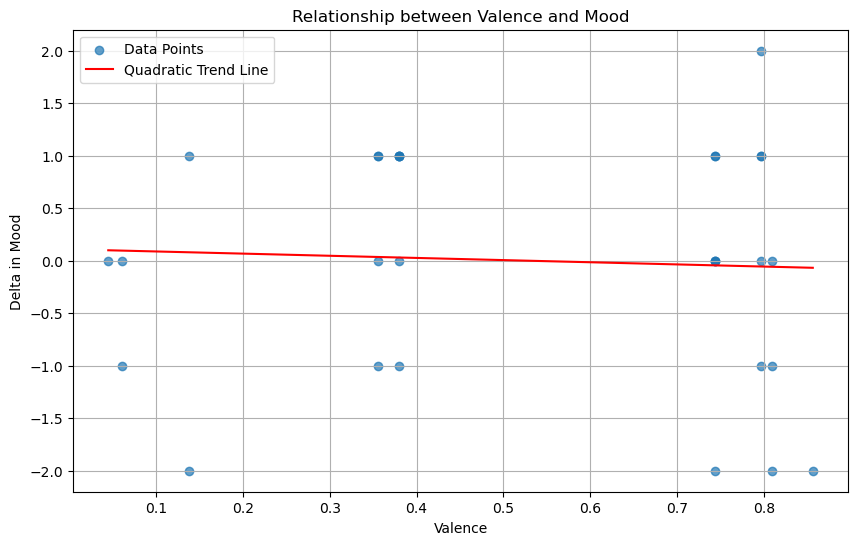

In [23]:
# Plotting the relationship between 'age' and 'eval'    
plt.figure(figsize=(10, 6))    
plt.scatter(finalData['valence'], finalData['delta'], alpha=0.7, label='Data Points')    
    
# Calculate and plot a polynomial (quadratic) trend line    
p = np.poly1d(np.polyfit(finalData['valence'], finalData['delta'], 1))    
ages = np.linspace(finalData['valence'].min(), finalData['valence'].max(), 100)    
plt.plot(ages, p(ages), color='red', label='Quadratic Trend Line')    
    
# Customize plot    
plt.title('Relationship between Valence and Mood')    
plt.xlabel('Valence')    
plt.ylabel('Delta in Mood')    
plt.legend()    
plt.grid(True)    
plt.show()   


In [24]:
m2 = smf.ols("delta ~ valence + Initial_Mood", finalData).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9100
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.415
Time:                        08:44:33   Log-Likelihood:                -44.324
No. Observations:                  30   AIC:                             94.65
Df Residuals:                      27   BIC:                             98.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1302      0.893      1.265      0.217      -0.702       2.963
valence         -0.0841      0.758     -0.111      0.912      -1.639       1.470
Initial_Mood    -0.1597      0.121     -1.321      0.198      -0.408       0.088
==============================================================================
Omnibus:                        2.552   Durbin-Watson:                   2.859
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.712
Skew:                          -0.368   Prob(JB):                        0.425
Kurtosis:                       2.090   Cond. No.                         33.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Calculate the mean of 'age'  
valence_mean = finalData['valence'].mean()  
initial_mood_mean = finalData['Initial_Mood'].mean()  
liked_song_mean = finalData['Liked_Song'].mean()
  
# Center the 'age' variable  
finalData['valence_centered'] = finalData['valence'] - valence_mean  
finalData['initial_mood_centered'] = finalData['Initial_Mood'] - initial_mood_mean  
finalData['liked_song_centered'] = finalData['Liked_Song'] - liked_song_mean  


In [26]:
m2 = smf.ols("delta ~ valence_centered + initial_mood_centered", finalData).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9100
Date:                Fri, 28 Feb 2025   Prob (F-statistic):              0.415
Time:                        08:44:34   Log-Likelihood:                -44.324
No. Observations:                  30   AIC:                             94.65
Df Residuals:                      27   BIC:                             98.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                      0      0.204          0      1.000      -0.419       0.419
valence_centered         -0.0841      0.758     -0.111      0.912      -1.639       1.470
initial_mood_centered    -0.1597      0.121     -1.321      0.198      -0.408       0.088
==============================================================================
Omnibus:                        2.552   Durbin-Watson:                   2.859
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                1.712
Skew:                          -0.368   Prob(JB):                        0.425
Kurtosis:                       2.090   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
m3 = smf.ols("delta ~ valence_centered + initial_mood_centered + liked_song_centered", finalData).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     5.058
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00682
Time:                        08:44:34   Log-Likelihood:                -38.407
No. Observations:                  30   AIC:                             84.81
Df Residuals:                      26   BIC:                             90.42
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                      0      0.171          0      1.000      -0.351       0.351
valence_centered          0.3354      0.645      0.520      0.607      -0.990       1.661
initial_mood_centered    -0.2467      0.104     -2.371      0.025      -0.461      -0.033
liked_song_centered       0.4333      0.122      3.546      0.002       0.182       0.685
==============================================================================
Omnibus:                        2.458   Durbin-Watson:                   3.169
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.699
Skew:                          -0.375   Prob(JB):                        0.428
Kurtosis:                       2.107   Cond. No.                         6.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
m4 = smf.ols("delta ~ valence_centered + initial_mood_centered + liked_song_centered + C(Heard_Before)", finalData).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delta   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3.672
Date:                Fri, 28 Feb 2025   Prob (F-statistic):             0.0174
Time:                        08:44:34   Log-Likelihood:                -38.370
No. Observations:                  30   AIC:                             86.74
Df Residuals:                      25   BIC:                             93.75
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0248      0.201     -0.124      0.902      -0.438       0.388
C(Heard_Before)[T.Yes]     0.1065      0.429      0.248      0.806      -0.778       0.991
valence_centered           0.3807      0.682      0.559      0.581      -1.023       1.785
initial_mood_centered     -0.2477      0.106     -2.335      0.028      -0.466      -0.029
liked_song_centered        0.4314      0.125      3.459      0.002       0.175       0.688
==============================================================================
Omnibus:                        2.534   Durbin-Watson:                   3.136
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.751
Skew:                          -0.387   Prob(JB):                        0.417
Kurtosis:                       2.105   Cond. No.                         7.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation

This Regression Model we are interpreting valence relationship with mood. To do this we control for initial mood, whether the listener liked the song, and if they had heard it before. The variable we are looking for in relationship to mood is valence_centered, which has a positive coeficient, meaning higher valence songs create a higher increase in mood. Increasing the valence by 0.1 point in the spotify scale will increase the delta in mood by 0.3807, keeping the initial mood and whether the song was liked at the mean, and heard before at 0. This result is not statistically signifigant, however this is likely from a small sample size, increasing the amount of subjects will likely create a stronger result. Compared to earlier iterations of the regression, controlling for whether they liked the song or not is an important factor, without this control the positive correlation between valence and mood is unclear. 

add
r-squared increase as we add variables showing improvement of model
heard before valence centered liked song are positive
future improvements? Changes?
include initial charts from google forms